In [1]:
import pandas as pd
import numpy as np
import re

file = r'..\..\results\Results_CO2Liq.xlsx'

In [2]:
df_result = pd.read_excel(file, sheet_name='ResultT')
df_duals = pd.read_excel(file, sheet_name='Duals')

In [3]:
df_duals
duals = -df_duals.iloc[:, 3].values
duals

array([91.94474283, 91.94474283, 91.94474283, ..., 82.96535342,
       83.37482645, 83.10184443], shape=(8760,))

In [4]:
# 2) Find the time columns in df_result and sort them numerically (T0001..T8760)
time_cols = [c for c in df_result.columns if re.fullmatch(r'T\d+', str(c))]
time_cols = sorted(time_cols, key=lambda x: int(x[1:]))

In [5]:
# 3) Build a new row aligned to df_result's columns
new_row = pd.Series(index=df_result.columns, dtype=object)
new_row['Result'] = 'Dual Value'
new_row['tech']   = pd.NA       # empty
new_row['energy'] = 'CO2Liq'
new_row.loc[time_cols] = duals[:len(time_cols)]

In [6]:
df_result = pd.concat([pd.DataFrame([new_row]), df_result], ignore_index=True)

In [7]:
df_slice = df_result.loc[:, list(df_result.columns[:3]) + list(df_result.loc[:, 'T5700':'T5780'].columns)]


In [8]:
#keep only operation data
df_operation = df_slice[df_slice['Result'] .isin (['Dual Value', 'Operation'])]

In [9]:
#keep relevant energy carriers
carriers = ['Electricity', 'HydrogenComp', 'CO2', 'CO2Liq', 'Methanol']
df_operation_energy = df_operation[df_operation['energy'].isin(carriers)].reset_index(drop=True)
df_operation_energy

,Result,tech,energy,T5700,T5701,T5702,T5703,T5704,T5705,T5706,...,T5771,T5772,T5773,T5774,T5775,T5776,T5777,T5778,T5779,T5780
0,Dual Value,<NA>,CO2Liq,89.615524,89.615524,89.615524,89.615524,89.615524,70.060019,-0.00000,...,90.142640,89.966937,89.966937,89.966937,89.966937,89.966937,89.966937,90.462316,89.966937,89.966937
1,Operation,WindTurbine,Electricity,5.192460,5.558280,5.814900,5.847660,5.389020,5.105100,6.13704,...,4.684680,5.935020,7.261800,8.146320,8.397480,8.315580,7.310940,5.798520,5.678400,6.153420
2,Operation,SolarPV,Electricity,15.336000,14.094000,12.015000,9.207000,6.237000,3.321000,0.99900,...,13.581000,14.013000,12.987000,10.719000,8.343000,5.778000,3.159000,0.918000,0.000000,0.000000
3,Operation,ElectricStorage,Electricity,0.000000,0.000000,0.000000,-1.684211,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,-0.502145,-1.182066,0.000000,0.000000,1.600000,0.000000
4,Operation,MethanolSynthesis,CO2Liq,-1.632458,-1.632458,-1.632458,-1.632458,-1.533801,-0.652983,0.00000,...,-1.632458,-1.632458,-1.632458,-1.632458,-1.632458,-1.632458,-1.632458,-1.632458,-1.632458,-1.632458
5,Operation,MethanolSynthesis,Electricity,-0.116604,-0.116604,-0.116604,-0.116604,-0.109557,-0.046642,0.00000,...,-0.116604,-0.116604,-0.116604,-0.116604,-0.116604,-0.116604,-0.116604,-0.116604,-0.116604,-0.116604
6,Operation,MethanolSynthesis,HydrogenComp,-0.223880,-0.223880,-0.223880,-0.223880,-0.210350,-0.089552,0.00000,...,-0.223880,-0.223880,-0.223880,-0.223880,-0.223880,-0.223880,-0.223880,-0.223880,-0.223880,-0.223880
7,Operation,MethanolSynthesis,Methanol,1.166042,1.166042,1.166042,1.166042,1.095572,0.466417,0.00000,...,1.166042,1.166042,1.166042,1.166042,1.166042,1.166042,1.166042,1.166042,1.166042,1.166042
8,Operation,Electrolysis_12_1,Electricity,-5.999984,-5.999984,-5.999984,-5.999984,-5.999984,-1.199997,0.00000,...,-5.999984,-5.999984,-5.999984,-5.999984,-5.999984,-5.999984,-5.999984,-1.199997,0.000000,-1.199997
9,Operation,Electrolysis_12_2,Electricity,-5.999984,-5.999984,-5.999984,-5.999984,-5.274771,-1.199997,0.00000,...,-5.999984,-5.999984,-5.999984,-5.999984,-5.999984,-5.999984,-4.128529,-1.199997,0.000000,0.000000


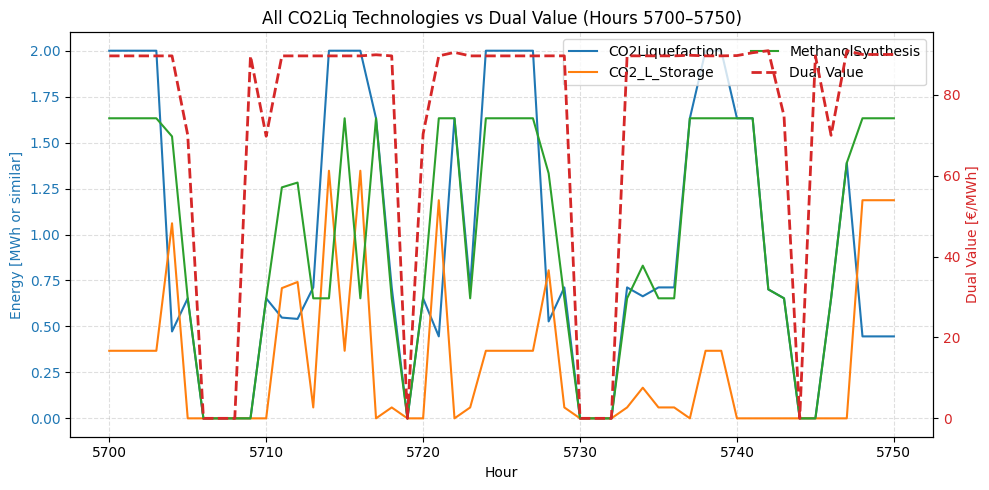

In [15]:
import matplotlib.pyplot as plt
import re

# --- 1) Define the time window and x-axis ---
start_col, end_col = 'T5700', 'T5750'
time_cols = [c for c in df_result.columns if re.fullmatch(r'T\d+', c)]
time_cols = sorted(time_cols, key=lambda x: int(x[1:]))  # ensure numeric order
time_window = [c for c in time_cols if start_col <= c <= end_col]
x = [int(c[1:]) for c in time_window]

# --- 2) Dual Value from df_result (secondary axis) ---
dual_row = df_result[df_result['Result'] == 'Dual Value']
dual_values = dual_row[time_window].iloc[0].astype(float).values

# --- 3) All techs with energy == 'CO2Liq' (primary axis), aggregated per tech ---
co2liq = df_operation_energy[df_operation_energy['energy'] == 'CO2Liq']

# keep only what's needed and ensure numeric
tmp = co2liq[['tech'] + time_window].copy()
tmp[time_window] = tmp[time_window].apply(pd.to_numeric, errors='coerce')

# ✅ Take absolute values so negatives become positive
tmp[time_window] = tmp[time_window].abs()

# aggregate per tech (sum or mean)
by_tech = tmp.groupby('tech')[time_window].sum()

# --- 4) Plot ---
fig, ax1 = plt.subplots(figsize=(10, 5))

# primary axis: one line per tech
for tech, row in by_tech.iterrows():
    ax1.plot(x, row.values, label=str(tech))

ax1.set_xlabel('Hour')
ax1.set_ylabel('Energy [MWh or similar]', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, linestyle='--', alpha=0.4)

# secondary axis: Dual Value
ax2 = ax1.twinx()
ax2.plot(x, dual_values, linestyle='--', linewidth=2, color='tab:red', label='Dual Value')
ax2.set_ylabel('Dual Value [€/MWh]', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# merge legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best', ncol=2)

plt.title('All CO2Liq Technologies vs Dual Value (Hours 5700–5750)')
fig.tight_layout()
plt.show()
